In [1]:
%load_ext line_profiler
import numpy as np
import matplotlib.pyplot as plt
from som import *
from matplotlib import animation, rc
from IPython.display import HTML

# 2D Features
## Plotting routines

In [2]:
def get_x_y(som):
    '''
        Extracts x and y coords on a 2D som.
    '''
    x = som_square.som[:,:,0].flatten()
    y = som_square.som[:,:,1].flatten()
    return x,y

def plot_2D_som(som):
    x,y = get_x_y(som)
    plt.scatter(x,y)
    plt.show()

def update_plot(i, frames, scat):
    scat.set_offsets(frames[i])
    return [scat]    

def movie_2D_som(frames):
    '''
        Gets HTML5 video out of frames.
    '''

    nb_frames = len(frames)
    x, y = [],[]

    fig = plt.figure()
    scat = plt.scatter([], [])
    plt.xlim(0,1)
    plt.ylim(0,1)

    ani = animation.FuncAnimation(fig, update_plot, frames=range(nb_frames),
                                  fargs=(frames, scat))
    return ani.to_html5_video()

## Square

In [3]:
square_data = np.random.rand(5000,2)
som_square = SOM(20,20,2)

In [4]:
%%time
frames_square = []
som_square.train(square_data,L0=0.8,lam=1e2,sigma0=10,frames=frames_square)

final t: 300
CPU times: user 2.91 s, sys: 12.4 ms, total: 2.93 s
Wall time: 2.95 s


In [8]:
%%time
print("quantization error:", som_square.quant_err())

quantization error: 0.0432528457322
CPU times: user 10.3 s, sys: 282 ms, total: 10.6 s
Wall time: 10.3 s


In [6]:
HTML(movie_2D_som(frames_square))

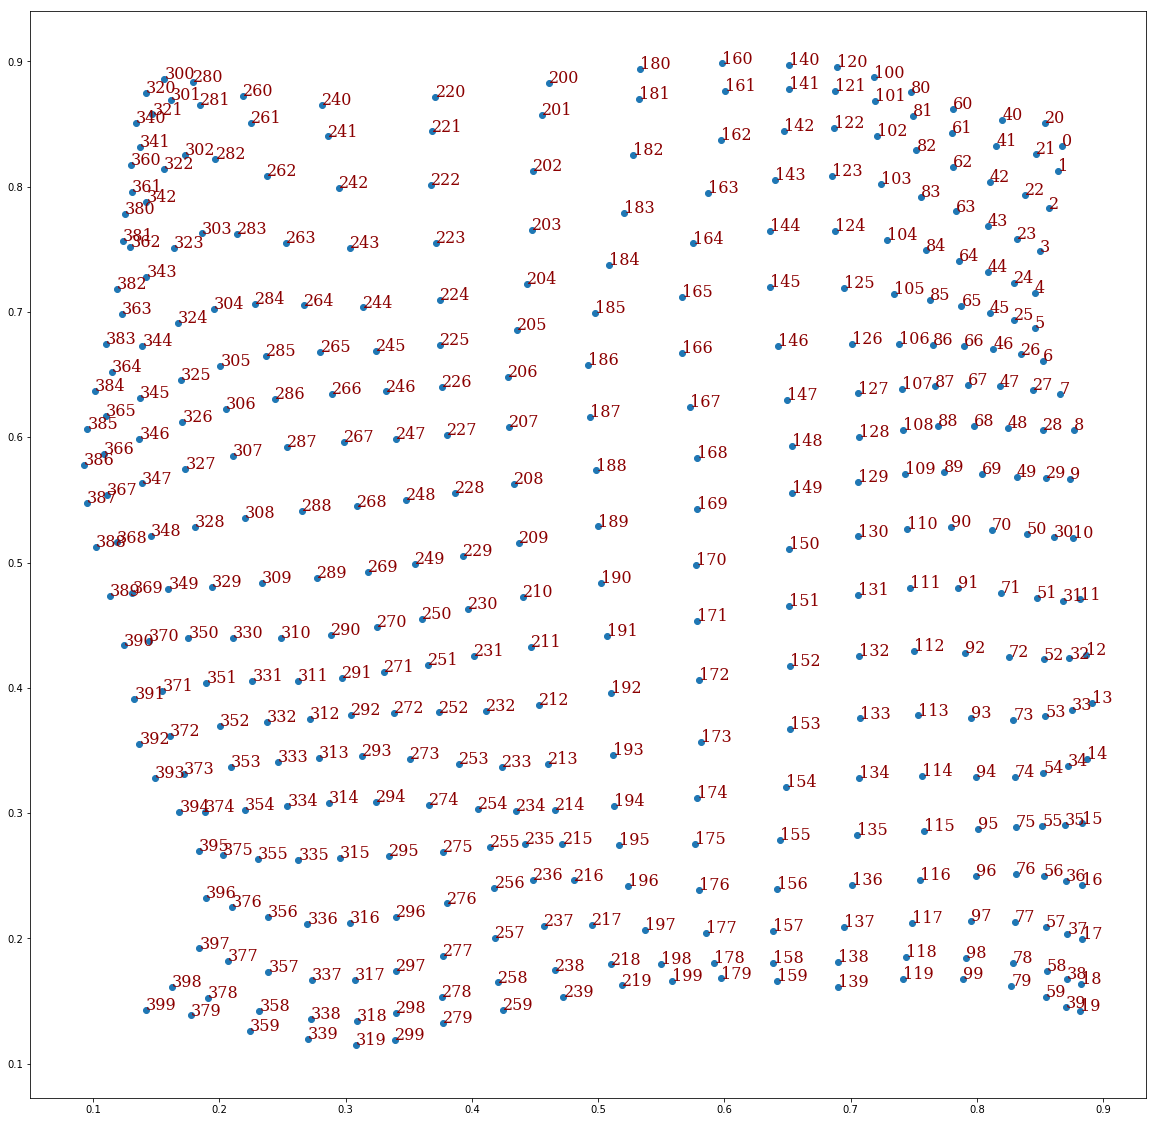

In [67]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
k = 0
plt.figure(figsize=(20,20))
x,y = get_x_y(som_square)
plt.scatter(x,y)
for y in range(som_square.shape[0]):
    for x in range(som_square.shape[1]):
        x_f,y_f = som_square.som[y,x]
        plt.text(x_f, y_f, str(k), fontdict=font)
        k += 1
plt.show()
